# Purpose
The purpose of this notebook is to clean the `kaggle_uncleaned.parquet` file, save it and generate an automated exploratory analysis report.

In [1]:
# Import modules
import pandas as pd
from utils.helper_v2 import ImmoHelper
import sweetviz as sv
import numpy as np
import warnings

warnings.filterwarnings("ignore")


In [2]:
helper = ImmoHelper(
    url="https://github.com/Immobilienrechner-Challenge/data/blob/main/kaggle_uncleaned.parquet?raw=true"
)
df = helper.process_data(return_gde=False, kaggle=True)


                                             |          | [  0%]   00:00 -> (? left)


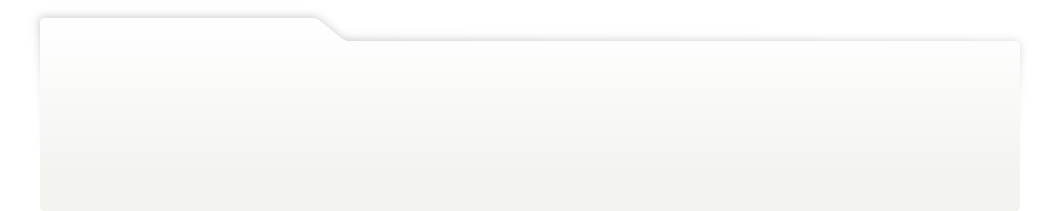
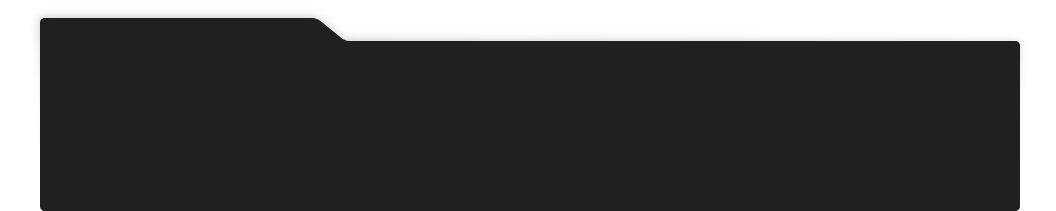
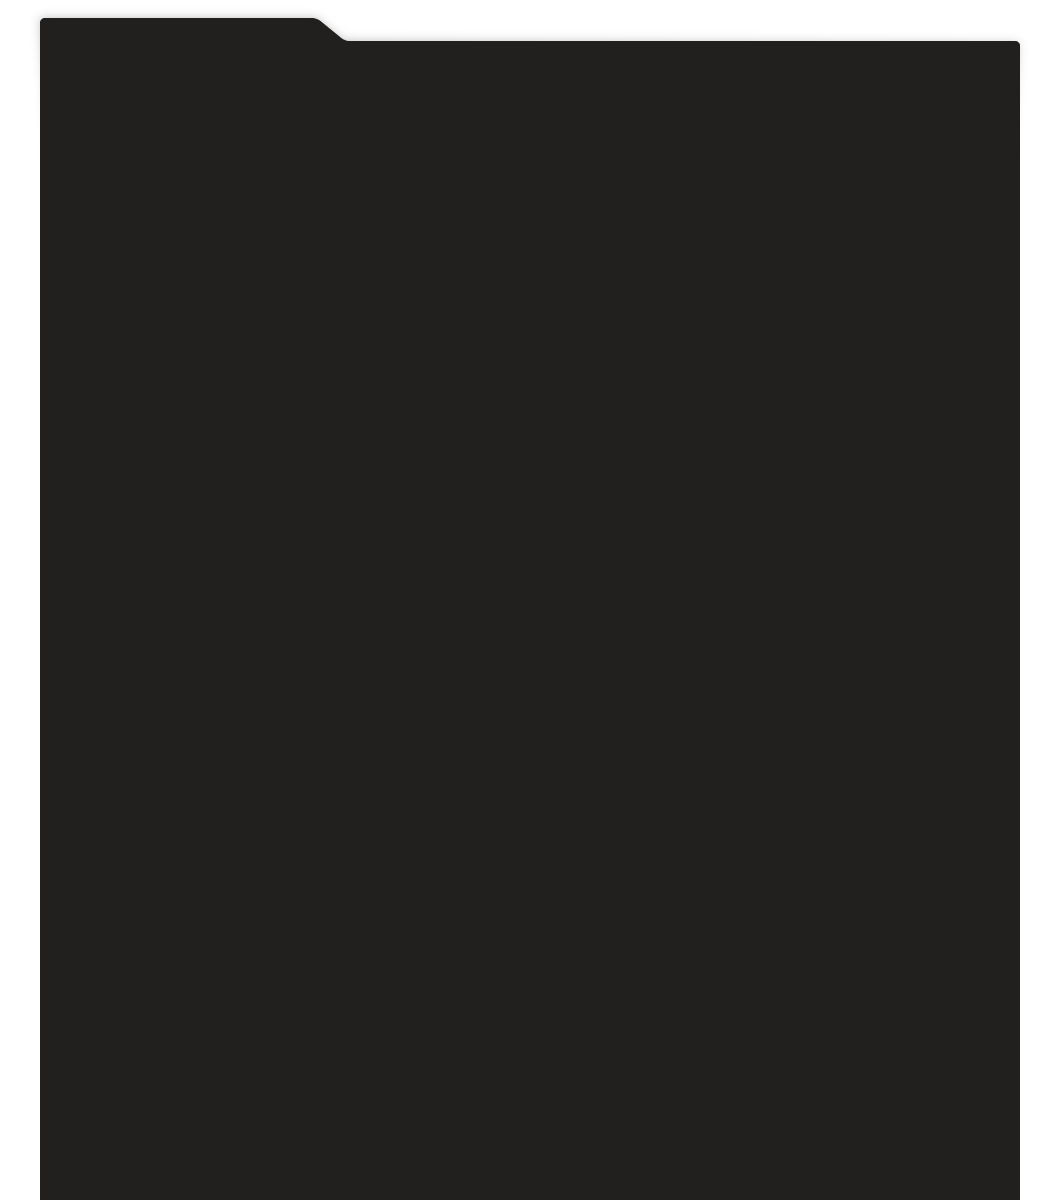
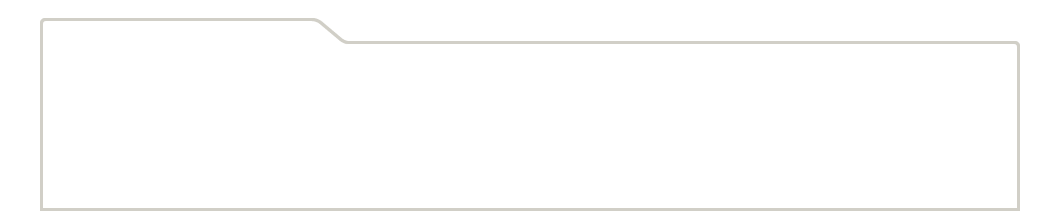
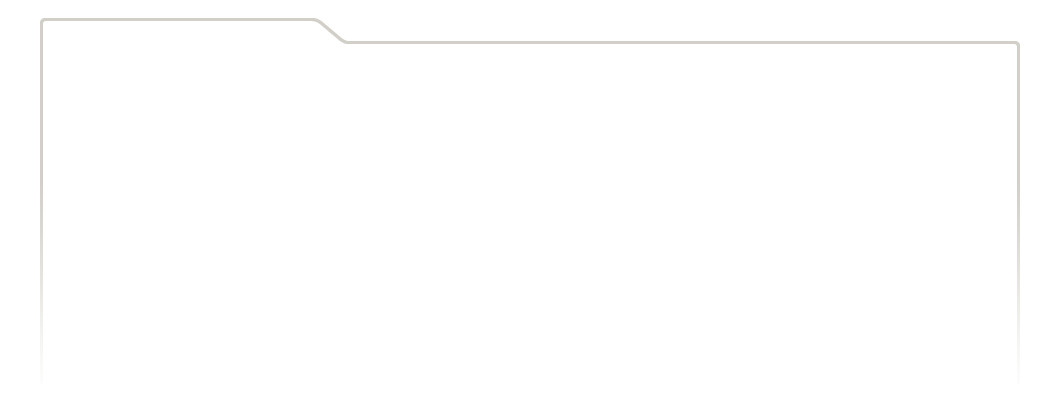
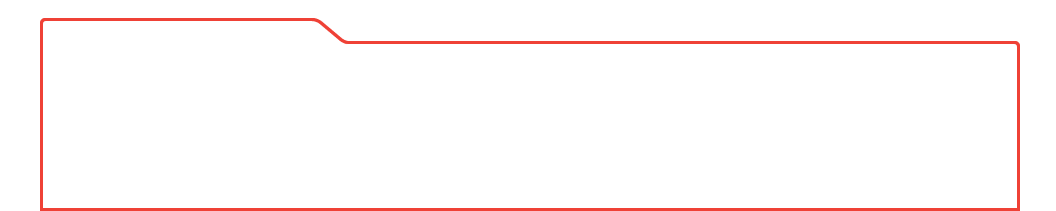
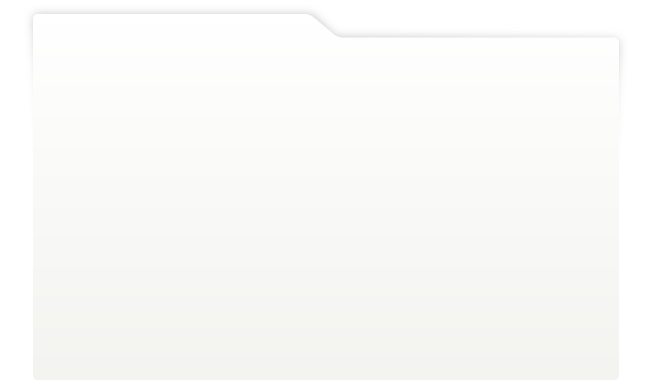
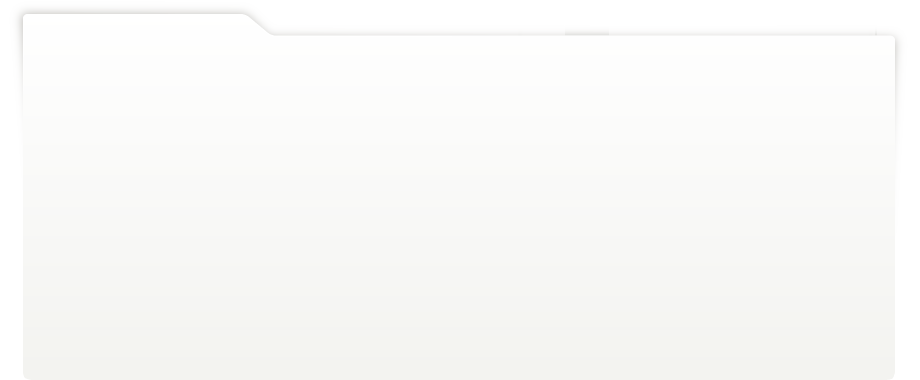
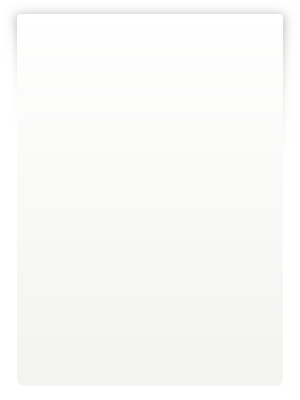
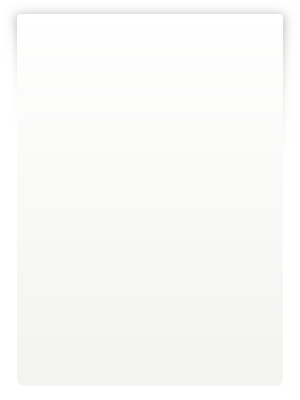
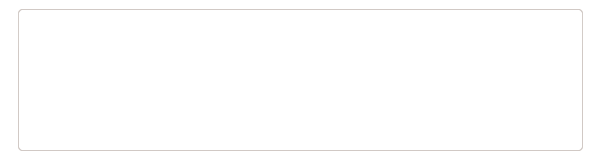
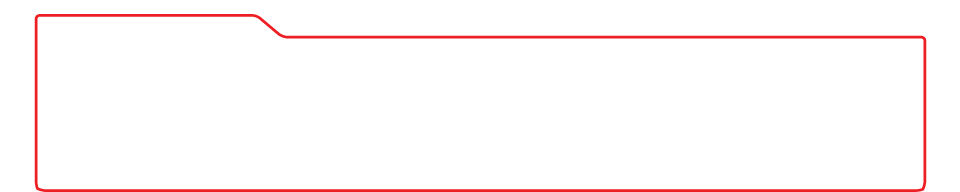
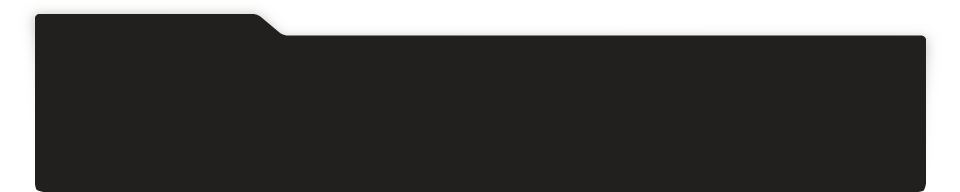
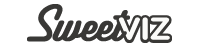
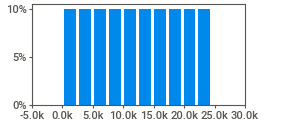
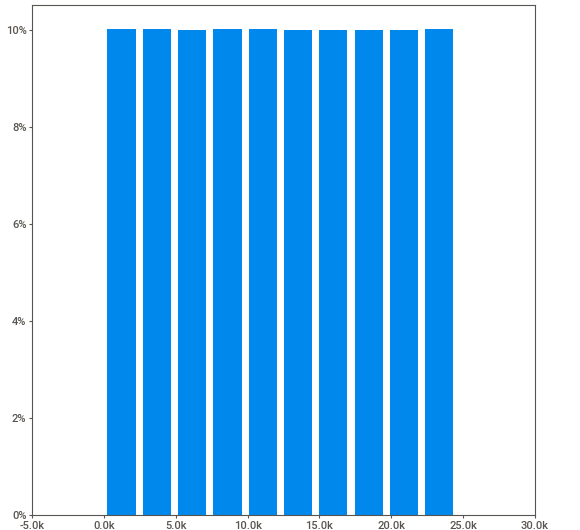
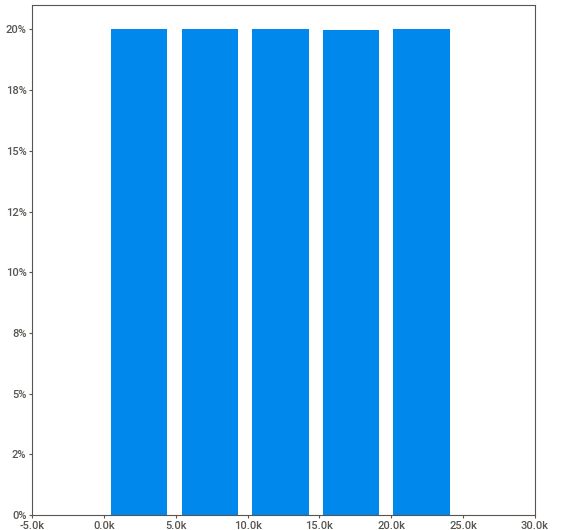
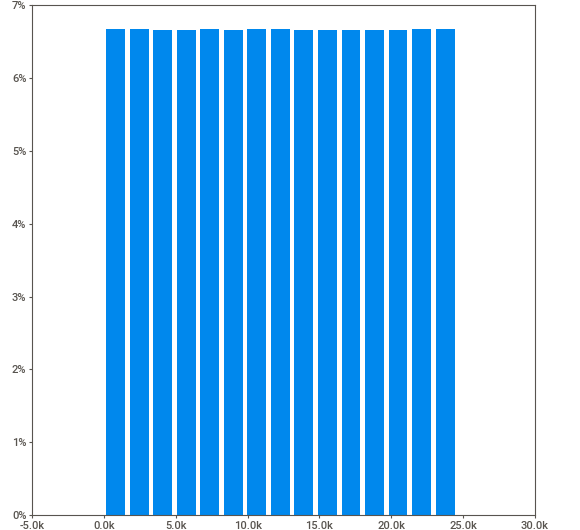
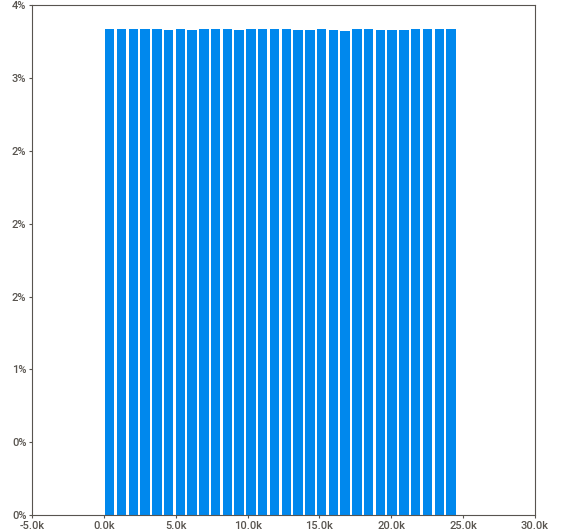
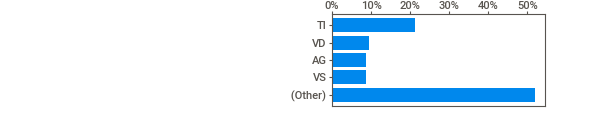
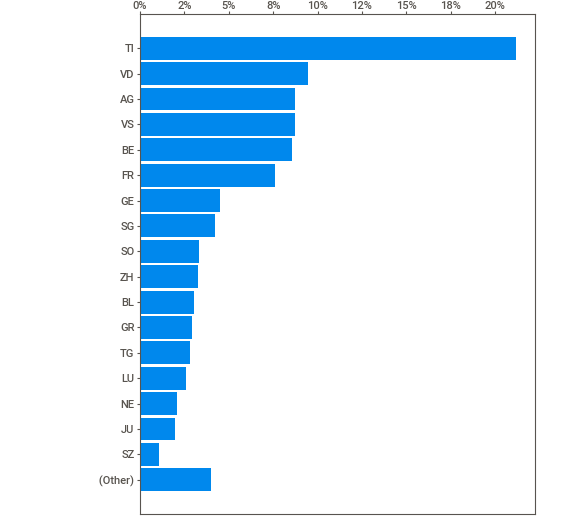
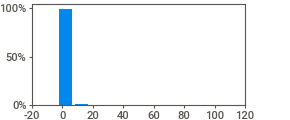
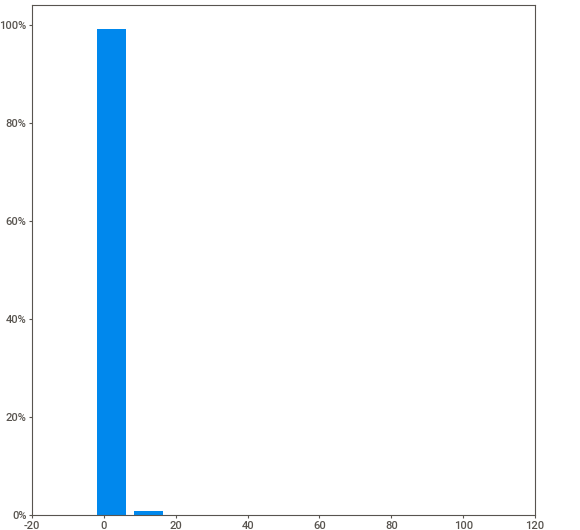
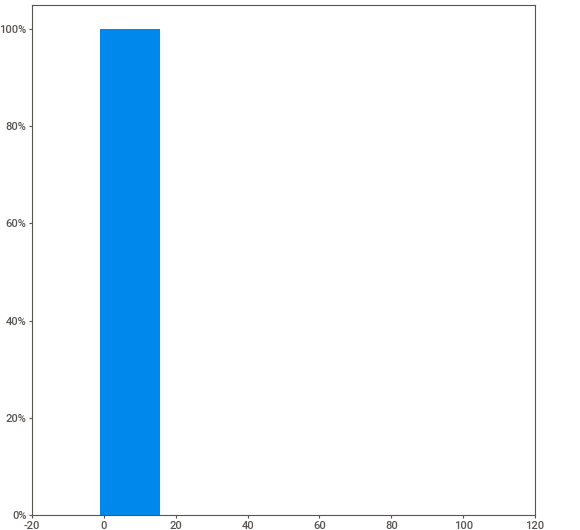
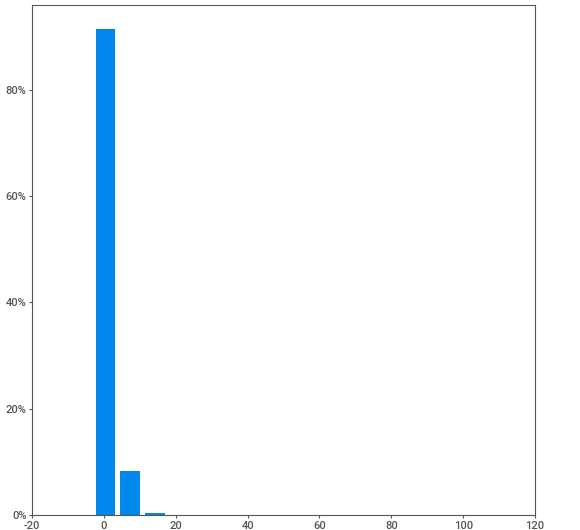
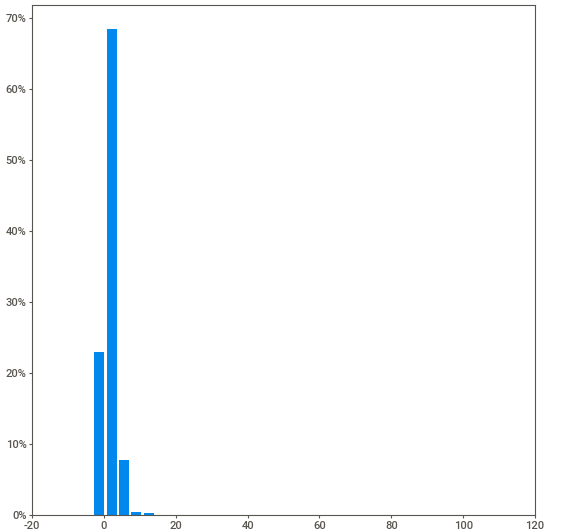
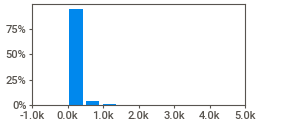
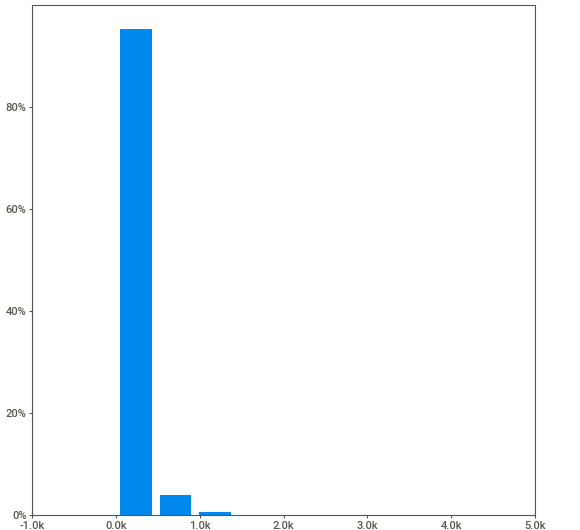
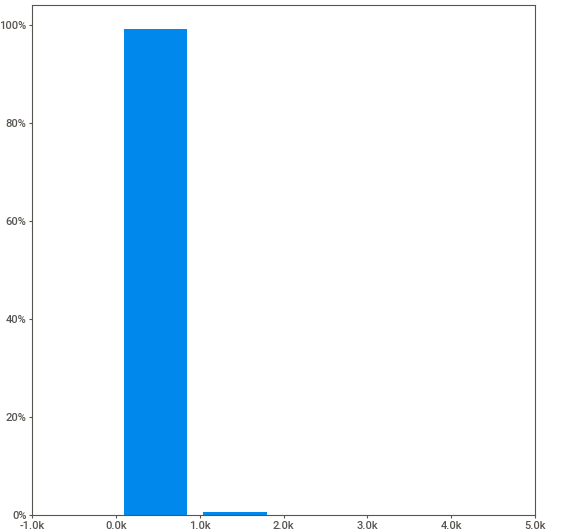
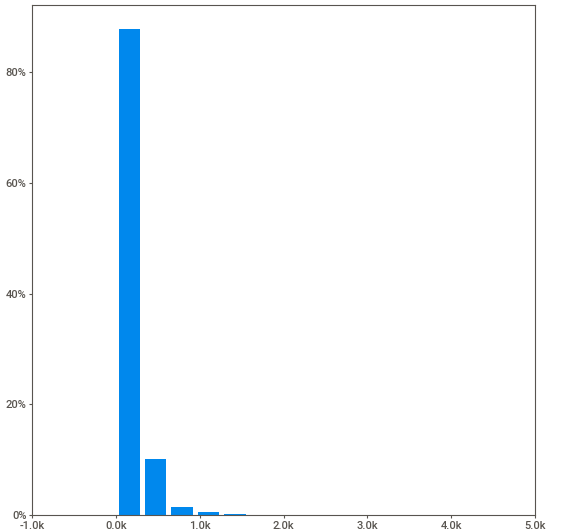
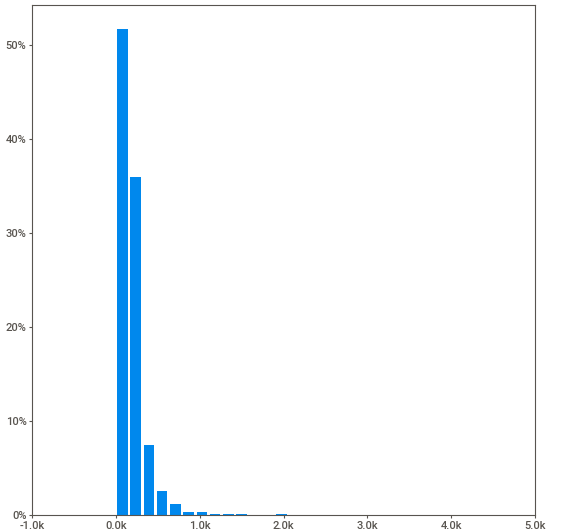
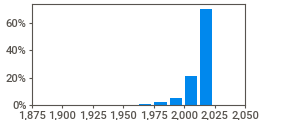
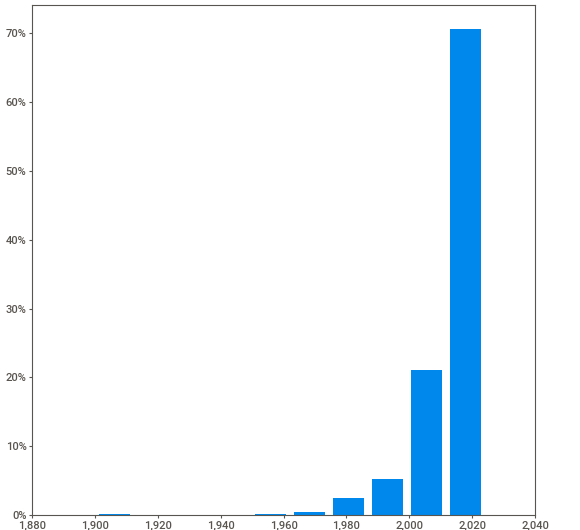
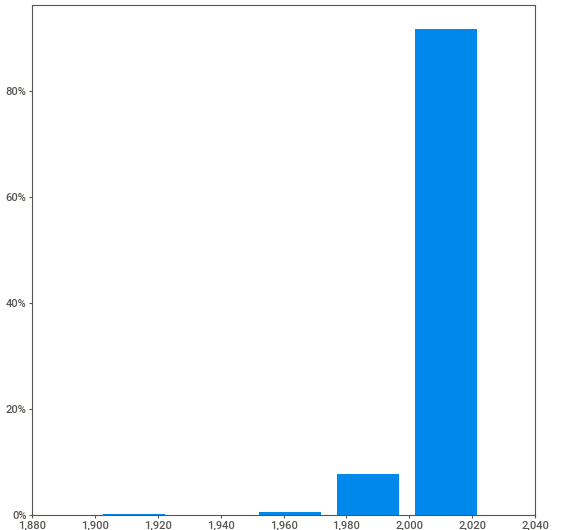
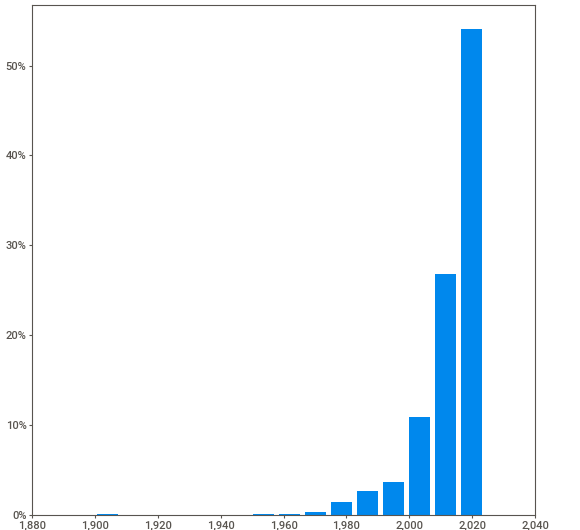
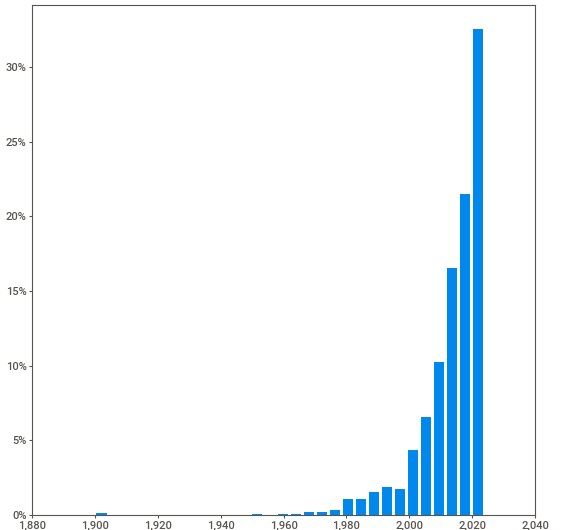
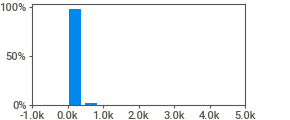
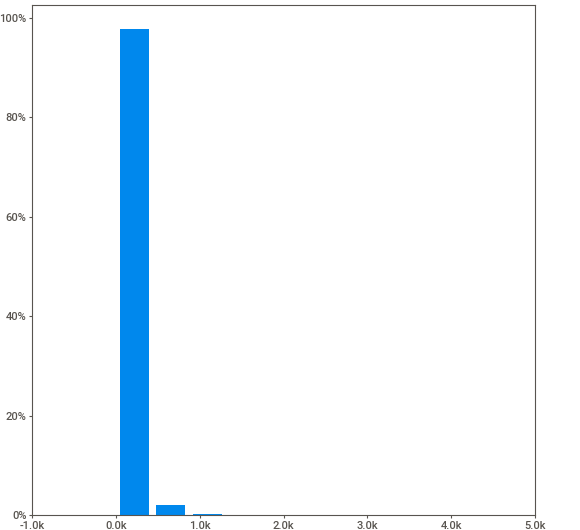
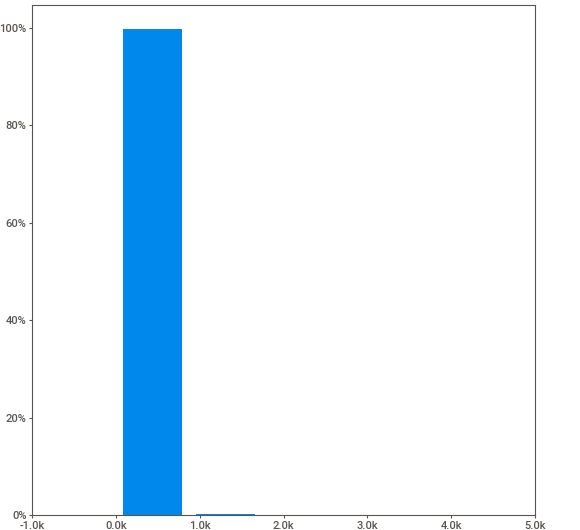
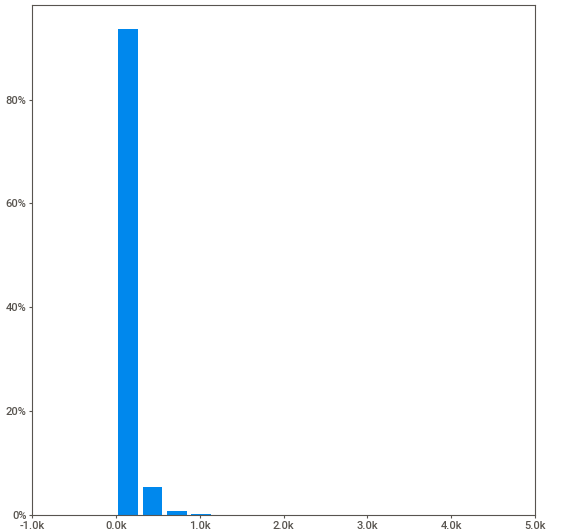
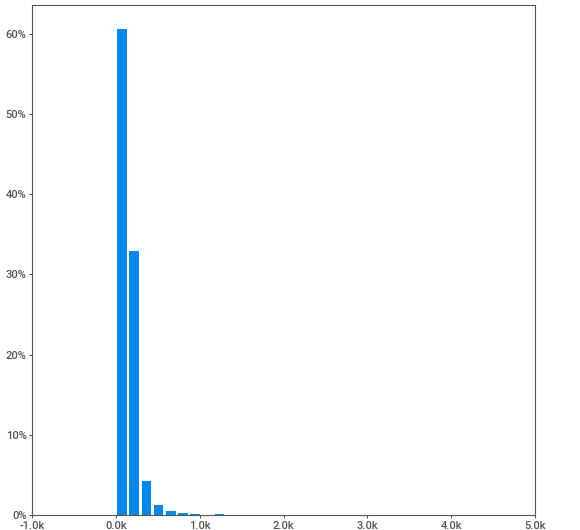
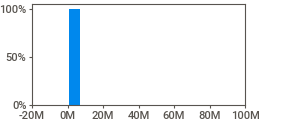
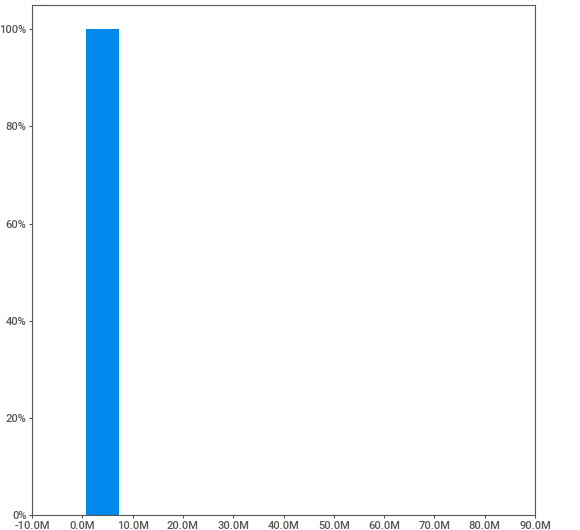
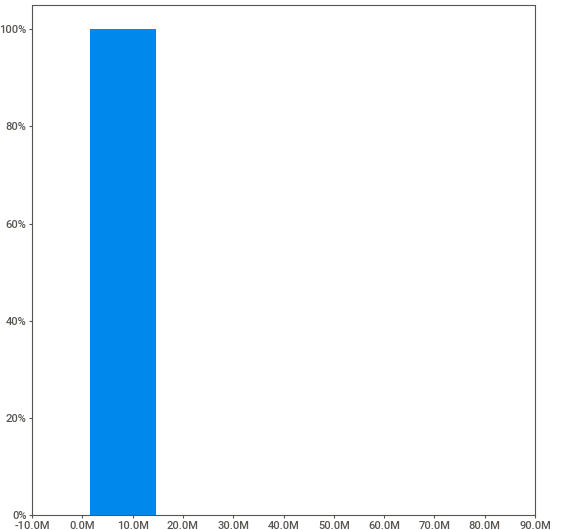
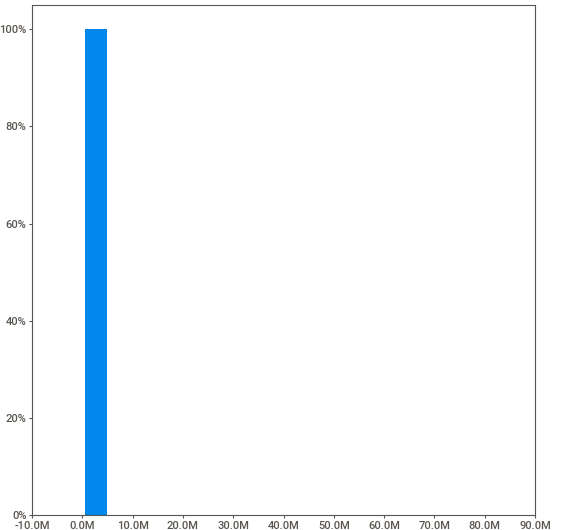
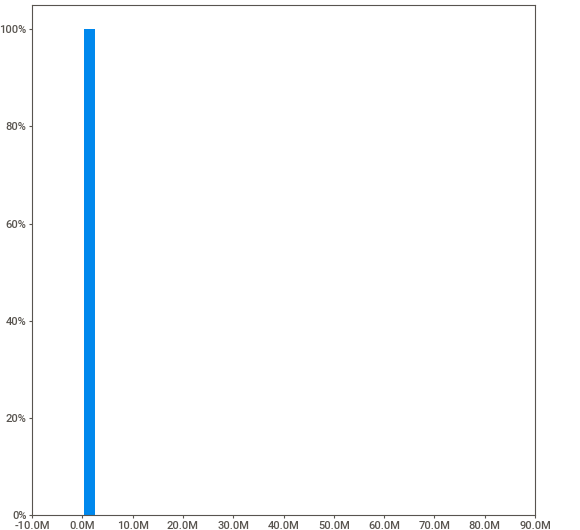
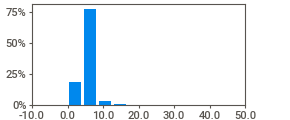
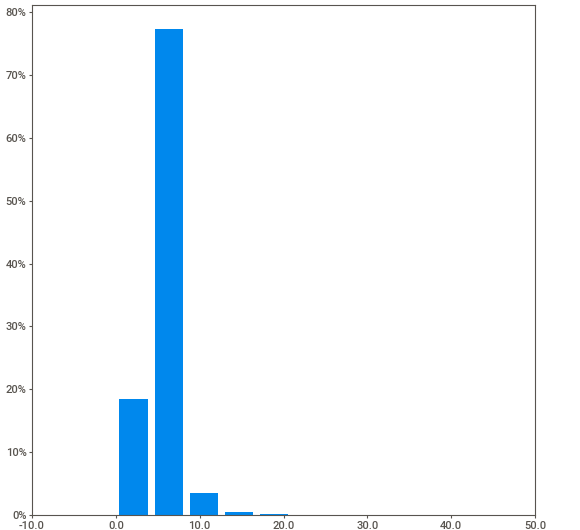
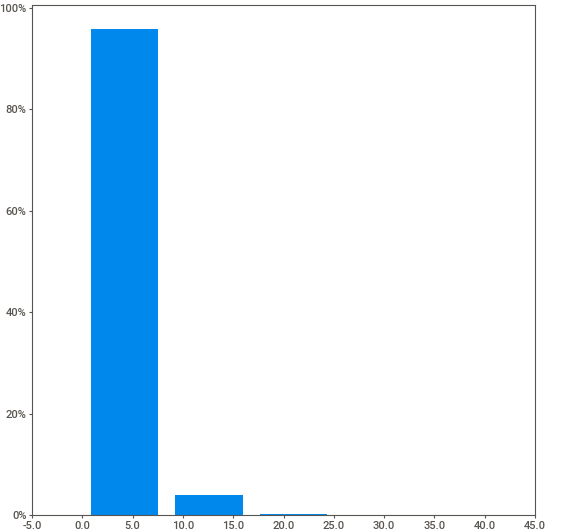
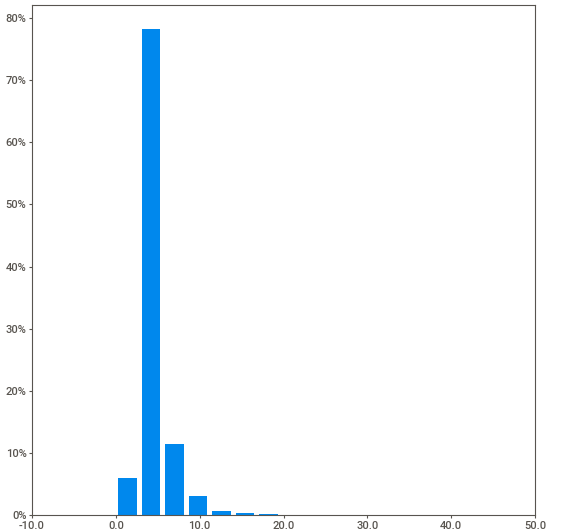
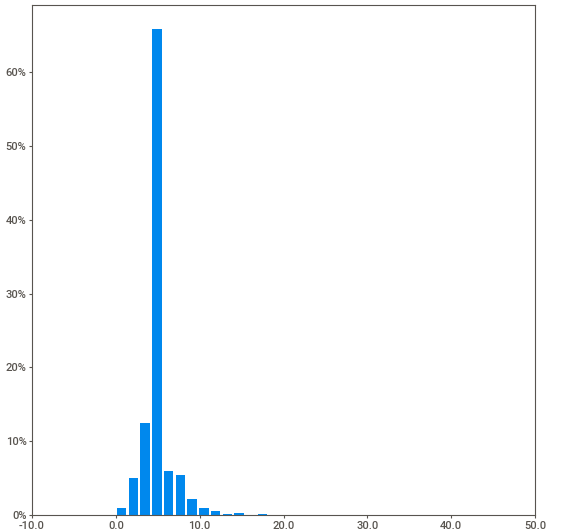
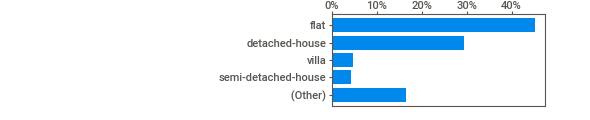
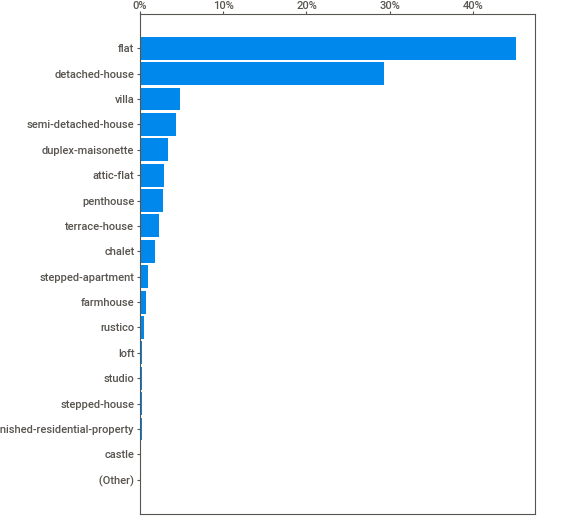
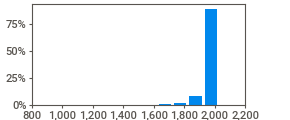
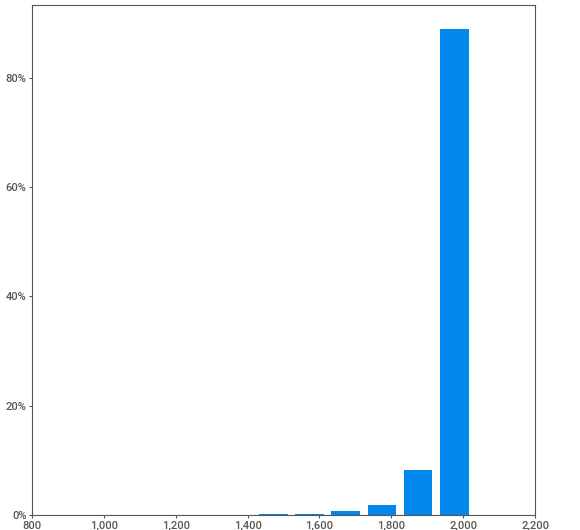
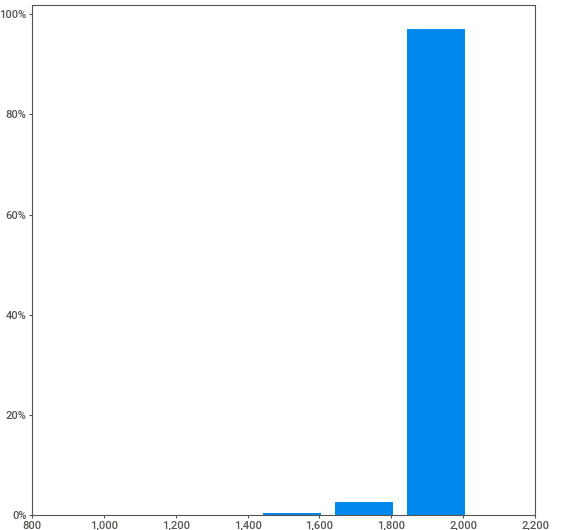
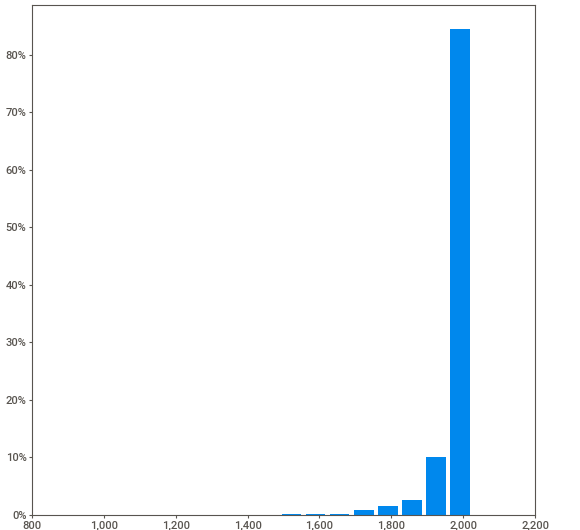
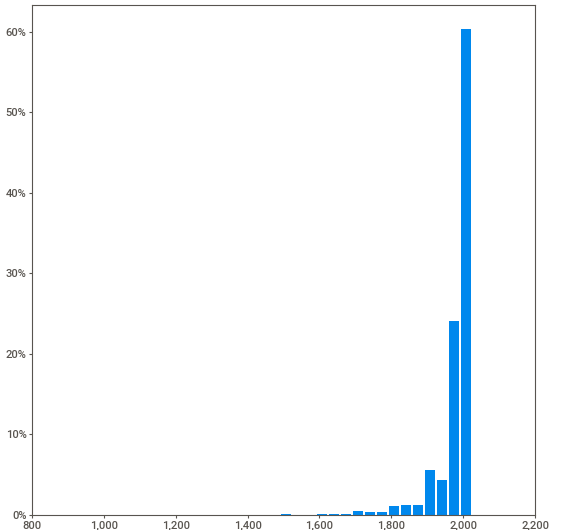
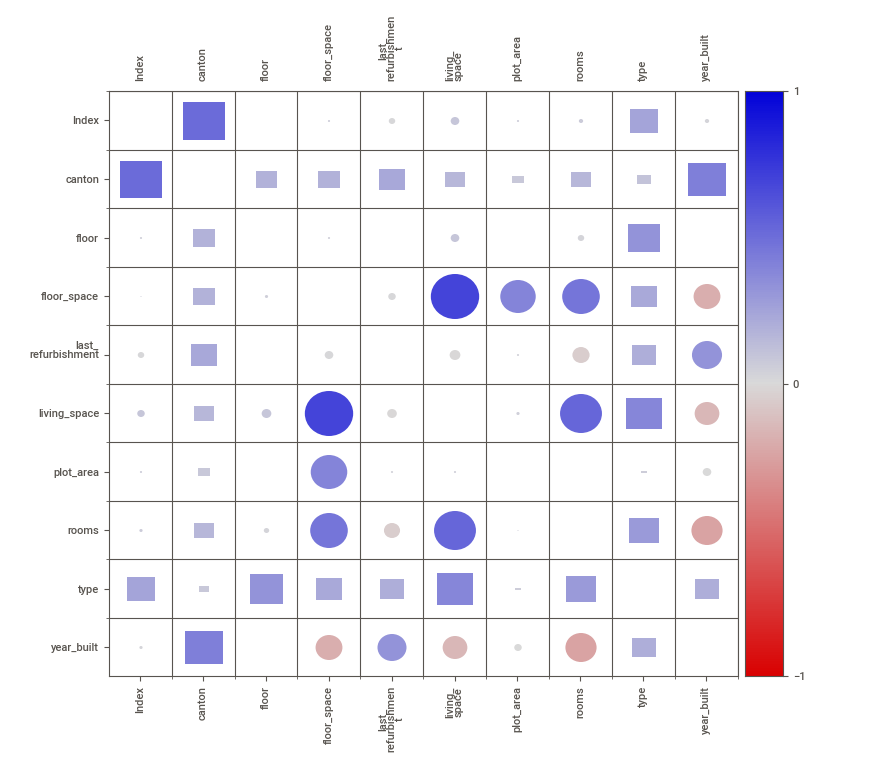
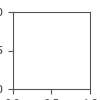

In [3]:
# reorder columns alphabetically and show sweetviz report
df = df.reindex(sorted(df.columns), axis=1)
sweet_report = sv.analyze(df)
sweet_report.show_notebook()


In [4]:
df.to_parquet("../../data/kaggle_cleaned.parquet")


In [5]:
df = helper.process_data(return_gde=True, kaggle=True)


In [6]:
df.to_parquet("../../data/kaggle_gde_cleaned.parquet")
